In [1]:
import pandas as pd
import numpy as np
from rdkit import Chem
from skimpy import skim
from rdkit.Chem import Descriptors,AllChem
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.metrics import mean_absolute_error,mean_squared_error,accuracy_score, confusion_matrix,classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Data1.csv')
df.head()

,Unnamed: 0,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,...,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value,target
0,0,NaN,NaN,105745.0,[],CHEMBL882330,inhibitory concentration required to inhibit n...,B,NaN,NaN,...,Neuraminidase,211044,NaN,NaN,IC50,uM,UO_0000065,NaN,40.000,CHEMBL2051
1,1,NaN,NaN,106883.0,[],CHEMBL882330,inhibitory concentration required to inhibit n...,B,NaN,NaN,...,Neuraminidase,211044,NaN,NaN,IC50,uM,UO_0000065,NaN,0.100,CHEMBL2051
2,2,NaN,NaN,113311.0,[],CHEMBL882330,inhibitory concentration required to inhibit n...,B,NaN,NaN,...,Neuraminidase,211044,NaN,NaN,IC50,uM,UO_0000065,NaN,10.000,CHEMBL2051
3,3,NaN,NaN,113312.0,[],CHEMBL882330,inhibitory concentration required to inhibit n...,B,NaN,NaN,...,Neuraminidase,211044,NaN,NaN,IC50,nM,UO_0000065,NaN,1.400,CHEMBL2051
4,4,NaN,NaN,114254.0,[],CHEMBL808314,Inhibitory activity against influenza A virus ...,B,NaN,NaN,...,Neuraminidase,211044,NaN,NaN,IC50,uM,UO_0000065,NaN,0.002,CHEMBL2051


In [3]:
skim(df)

c:\users\03aay\appdata\local\programs\python\python38\lib\site-packages\numpy\lib\histograms.py:883: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 5632   │ │ string      │ 32    │                                                          │
│ │ Number of columns │ 48     │ │ float64     │ 14    │                                                          │
│ └───────────────────┴────────┘ │ int32       │ 2     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_n ┃      ┃       ┃          ┃          ┃        ┃         ┃          ┃          ┃          ┃        ┃  │
│ ┃ ame      ┃ NA   ┃ NA %  ┃ mean     ┃ sd       ┃ p0     ┃ p25     ┃ p50      ┃ p75      ┃ p100     ┃ hist   ┃  │
│ ┡━━━━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━┩  │
│ │ Unnamed: │    0 │     0 │     2800 │     1600 │      0 │    1400 │     2800 │     4200 │     5600 │ ▇▇▇▇▇▇ │  │
│ │ 0        │      │       │          │          │        │         │          │          │          │        │  │
│ │ activity │    0 │     0 │ 12000000 │  7200000 │ 110000 │ 3600000 │ 15000000 │ 18000000 │ 25000000 │ ▅▁▁▃▇  │  │
│ │ _id      │      │       │          │          │        │         │          │          │          │        │  │
│ │ document │    0 │     0 │     2000 │      6.2 │   2000 │    2000 │     2000 │     2000 │     2000 │ ▃▁▂▇▇▇ │  │
│ │ _year    │      │       │          │          │        │         │          │          │          │        │  │
│ │ pchembl_ │ 1548 │ 27.49 │      6.2 │      1.5 │      3 │       5 │      5.9 │      7.2 │       11 │ ▁▇▇▅▃  │  │
│ │ value    │      │       │          │          │        │         │          │          │          │        │  │
│ │ potentia │    0 │     0 │    0.082 │     0.27 │      0 │       0 │        0 │        0 │        1 │ ▇    ▁ │  │
│ │ l_duplic │      │       │          │          │        │         │          │          │          │        │  │
│ │ ate      │      │       │          │          │        │         │          │          │          │        │  │
│ │ record_i │    0 │     0 │  2000000 │  1100000 │  23000 │  980000 │  2300000 │  3000000 │  3900000 │ ▃▃▅▅▇▁ │  │
│ │ d        │      │       │          │          │        │         │          │          │          │        │  │
│ │ src_id   │    0 │     0 │      8.3 │       15 │      1 │       1 │        1 │        1 │       38 │ ▇    ▂ │  │
│ │ standard │    0 │     0 │     0.98 │     0.14 │      0 │       1 │        1 │        1 │        1 │      ▇ │  │
│ │ _flag    │      │       │          │          │        │         │          │          │          │        │  │
│ │ standard │ 5632 │   100 │      nan │      nan │    nan │     nan │      nan │      nan │      nan │        │  │
│ │ _text_va │      │       │          │          │        │         │          │          │          │        │  │
│ │ lue      │      │       │          │          │        │         │          │          │          │        │  │
│ │ standard │ 5632 │   100 │      nan │      nan │    nan │     nan │      nan │      nan │      nan │        │  │
│ │ _upper_v │      │       │          │          │     

In [4]:
df = df.drop(["upper_value","toid","text_value","standard_upper_value","standard_text_value","data_validity_description",
             "data_validity_comment","molecule_pref_name","assay_variant_mutation","assay_variant_accession",
             "activity_comment","activity_properties","action_type","ligand_efficiency"],axis=1)

In [5]:
pd.unique(df['units'])

array(['uM', 'nM', 'ng ml-1', 'NM', nan, 'microM', 'ug ml-1',
       "10'-4 ug/ml", 'umol/L', "10'-4umol/L", 'ng/ml', "10'-10M",
       "10'-4microM", 'mM', "10'-6M", "10'-5M"], dtype=object)

In [6]:
pd.unique(df['standard_units'])

array(['nM', 'ug.mL-1', nan, "10'-4umol/L"], dtype=object)

In [7]:
def convert_values(row):
    try:
        value = pd.to_numeric(row['value'],errors='coerce')
    except ValueError:
        return None
    if row['units'] == 'uM' or row['units'] == 'microM' or row['units'] == 'umol/L' or row['units'] == "10'-6M":
        return value / 1000000
    elif (row['units'] == 'nM') or (row['units'] == 'NM') or (row['units'] == "10'-9M"):
        return value / 1000000000
    elif row['units'] ==  "10'-10M":
        return value / 10000000000
    elif row['units'] == "10'-4microM":
        return value / 10000000000
    elif row['units'] == "10'-8M":
        return value / 100000000
    elif row['units'] == "10'-7M":
        return value / 10000000
    elif row['units'] == "10'-5M":
        return value / 100000
    elif row['units'] == 'mM':
        return value / 1000
    else:
        return value

In [8]:
df['value'] = df.apply(convert_values, axis = 1)

In [9]:
cf_ug_per_mL_to_nM = 1000  
cf_umol_per_L_to_nM = 1e4  

def convert_to_nM(value, unit):
    if pd.isnull(value) or pd.isnull(unit):
        return value
    
    if unit == 'nM':
        return value
    elif unit == 'ug.mL-1':
        # Convert ug.mL-1 to nM
        return value * cf_ug_per_mL_to_nM
    elif unit == "10'-4umol/L":
        # Convert 10'-4umol/L to nM
        return value * cf_umol_per_L_to_nM
    else:
        return value

In [10]:
df['standard_value'] = df.apply(lambda row: convert_to_nM(row['standard_value'], row['standard_units']), axis=1)

In [11]:
df['standard_units'] = 'nM'

df['units'] = 'M'

In [12]:
df

,Unnamed: 0,activity_id,assay_chembl_id,assay_description,assay_type,bao_endpoint,bao_format,bao_label,canonical_smiles,document_chembl_id,...,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,type,units,uo_units,value,target
0,0,105745.0,CHEMBL882330,inhibitory concentration required to inhibit n...,B,BAO_0000190,BAO_0000357,single protein format,CC(=O)N[C@@H]([C@H](O)[C@H](O)CO)[C@H]1OC(O)(C...,CHEMBL1133646,...,40000.0,CHEMBL2051,Influenza A virus (A/Puerto Rico/8/1934(H1N1)),Neuraminidase,211044,IC50,M,UO_0000065,4.000000e-05,CHEMBL2051
1,1,106883.0,CHEMBL882330,inhibitory concentration required to inhibit n...,B,BAO_0000190,BAO_0000357,single protein format,CCCCC(NC(C)=O)[C@@H]1CC(C(=O)O)C[C@H]1N=C(N)N,CHEMBL1133646,...,100.0,CHEMBL2051,Influenza A virus (A/Puerto Rico/8/1934(H1N1)),Neuraminidase,211044,IC50,M,UO_0000065,1.000000e-07,CHEMBL2051
2,2,113311.0,CHEMBL882330,inhibitory concentration required to inhibit n...,B,BAO_0000190,BAO_0000357,single protein format,CC(=O)N[C@H]1[C@H]([C@H](O)[C@H](O)CO)OC(C(=O)...,CHEMBL1133646,...,10000.0,CHEMBL2051,Influenza A virus (A/Puerto Rico/8/1934(H1N1)),Neuraminidase,211044,IC50,M,UO_0000065,1.000000e-05,CHEMBL2051
3,3,113312.0,CHEMBL882330,inhibitory concentration required to inhibit n...,B,BAO_0000190,BAO_0000357,single protein format,CCC(CC)[C@H](NC(C)=O)[C@@H]1[C@H](O)[C@@H](C(=...,CHEMBL1133646,...,1.4,CHEMBL2051,Influenza A virus (A/Puerto Rico/8/1934(H1N1)),Neuraminidase,211044,IC50,M,UO_0000065,1.400000e-09,CHEMBL2051
4,4,114254.0,CHEMBL808314,Inhibitory activity against influenza A virus ...,B,BAO_0000190,BAO_0000357,single protein format,CC(=O)N[C@H]1[C@H]([C@H](O)[C@H](O)CO)OC(C(=O)...,CHEMBL1152059,...,2.0,CHEMBL2051,Influenza A virus (A/Puerto Rico/8/1934(H1N1)),Neuraminidase,211044,IC50,M,UO_0000065,2.000000e-09,CHEMBL2051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5627,5627,17722735.0,CHEMBL3887623,Inhibition Assay: The activated cathepsin A wa...,B,BAO_0000190,BAO_0000357,single protein format,Cc1nnc(C(CC(=O)O)c2cccc(-c3ccccc3C#N)c2)o1,CHEMBL3886385,...,4740.0,CHEMBL6115,Homo sapiens,Lysosomal protective protein,9606,IC50,M,UO_0000065,4.740000e-06,CHEMBL6115
5628,5628,17722736.0,CHEMBL3887623,Inhibition Assay: The activated cathepsin A wa...,B,BAO_0000190,BAO_0000357,single protein format,Cc1nnc(C(CC(=O)O)c2cccc(-c3cccnc3)c2)o1,CHEMBL3886385,...,6710.0,CHEMBL6115,Homo sapiens,Lysosomal protective protein,9606,IC50,M,UO_0000065,6.710000e-06,CHEMBL6115
5629,5629,17722737.0,CHEMBL3887623,Inhibition Assay: The activated cathepsin A wa...,B,BAO_0000190,BAO_0000357,single protein format,Cc1nnc(C(CC(=O)O)c2cccc(-c3ccncc3)c2)o1,CHEMBL3886385,...,20600.0,CHEMBL6115,Homo sapiens,Lysosomal protective protein,9606,IC50,M,UO_0000065,2.060000e-05,CHEMBL6115
5630,5630,17722738.0,CHEMBL3887623,Inhibition Assay: The activated cathepsin A wa...,B,BAO_0000190,BAO_0000357,single protein format,Cc1nnc(C(CC(=O)O)c2cccc(-c3ccccc3)c2)o1,CHEMBL3886385,...,935.0,CHEMBL6115,Homo sapiens,Lysosomal protective protein,9606,IC50,M,UO_0000065,9.350000e-07,CHEMBL6115


In [13]:
def smiles_to_mol(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:
        return Chem.RDKFingerprint(mol)
    else:
        return None

In [14]:
df = df.drop(['activity_id','assay_chembl_id','assay_description','assay_type','bao_endpoint',
              'bao_format','bao_label','document_chembl_id','document_journal','document_year',
              'target_chembl_id','target_organism','target_pref_name','target_tax_id','molecule_chembl_id',
              'parent_molecule_chembl_id','potential_duplicate','qudt_units','record_id','relation',
              'src_id','standard_flag'], axis = 1)
df.head()

,Unnamed: 0,canonical_smiles,pchembl_value,standard_relation,standard_type,standard_units,standard_value,type,units,uo_units,value,target
0,0,CC(=O)N[C@@H]([C@H](O)[C@H](O)CO)[C@H]1OC(O)(C...,4.40,=,IC50,nM,40000.0,IC50,M,UO_0000065,4.000000e-05,CHEMBL2051
1,1,CCCCC(NC(C)=O)[C@@H]1CC(C(=O)O)C[C@H]1N=C(N)N,7.00,=,IC50,nM,100.0,IC50,M,UO_0000065,1.000000e-07,CHEMBL2051
2,2,CC(=O)N[C@H]1[C@H]([C@H](O)[C@H](O)CO)OC(C(=O)...,5.00,=,IC50,nM,10000.0,IC50,M,UO_0000065,1.000000e-05,CHEMBL2051
3,3,CCC(CC)[C@H](NC(C)=O)[C@@H]1[C@H](O)[C@@H](C(=...,8.85,=,IC50,nM,1.4,IC50,M,UO_0000065,1.400000e-09,CHEMBL2051
4,4,CC(=O)N[C@H]1[C@H]([C@H](O)[C@H](O)CO)OC(C(=O)...,8.70,=,IC50,nM,2.0,IC50,M,UO_0000065,2.000000e-09,CHEMBL2051


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5632 entries, 0 to 5631
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         5632 non-null   int64  
 1   canonical_smiles   5632 non-null   object 
 2   pchembl_value      4084 non-null   float64
 3   standard_relation  5513 non-null   object 
 4   standard_type      5632 non-null   object 
 5   standard_units     5632 non-null   object 
 6   standard_value     5513 non-null   float64
 7   type               5632 non-null   object 
 8   units              5632 non-null   object 
 9   uo_units           5527 non-null   object 
 10  value              5513 non-null   float64
 11  target             5632 non-null   object 
dtypes: float64(3), int64(1), object(8)
memory usage: 528.1+ KB


In [16]:
df = df.drop(['Unnamed: 0','standard_relation','standard_type','standard_units','type',
              'units','uo_units','value'], axis = 1)
df.head()

,canonical_smiles,pchembl_value,standard_value,target
0,CC(=O)N[C@@H]([C@H](O)[C@H](O)CO)[C@H]1OC(O)(C...,4.40,40000.0,CHEMBL2051
1,CCCCC(NC(C)=O)[C@@H]1CC(C(=O)O)C[C@H]1N=C(N)N,7.00,100.0,CHEMBL2051
2,CC(=O)N[C@H]1[C@H]([C@H](O)[C@H](O)CO)OC(C(=O)...,5.00,10000.0,CHEMBL2051
3,CCC(CC)[C@H](NC(C)=O)[C@@H]1[C@H](O)[C@@H](C(=...,8.85,1.4,CHEMBL2051
4,CC(=O)N[C@H]1[C@H]([C@H](O)[C@H](O)CO)OC(C(=O)...,8.70,2.0,CHEMBL2051


In [17]:
df['fingerprint'] = df['canonical_smiles'].apply(smiles_to_mol)

In [18]:
df.head()

,canonical_smiles,pchembl_value,standard_value,target,fingerprint
0,CC(=O)N[C@@H]([C@H](O)[C@H](O)CO)[C@H]1OC(O)(C...,4.40,40000.0,CHEMBL2051,"[1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, ..."
1,CCCCC(NC(C)=O)[C@@H]1CC(C(=O)O)C[C@H]1N=C(N)N,7.00,100.0,CHEMBL2051,"[0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ..."
2,CC(=O)N[C@H]1[C@H]([C@H](O)[C@H](O)CO)OC(C(=O)...,5.00,10000.0,CHEMBL2051,"[1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, ..."
3,CCC(CC)[C@H](NC(C)=O)[C@@H]1[C@H](O)[C@@H](C(=...,8.85,1.4,CHEMBL2051,"[1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, ..."
4,CC(=O)N[C@H]1[C@H]([C@H](O)[C@H](O)CO)OC(C(=O)...,8.70,2.0,CHEMBL2051,"[1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, ..."


In [19]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 5632   │ │ string      │ 2     │                                                          │
│ │ Number of columns │ 4      │ │ float64     │ 2     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━┳━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name  ┃ NA   ┃ NA %  ┃ mean       ┃ sd          ┃ p0   ┃ p25 ┃ p50  ┃ p75   ┃ p100         ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━╇━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━┩  │
│ │ pchembl_valu │ 1548 │ 27.49 │        6.2 │         1.5 │    3 │   5 │  5.9 │   7.2 │           11 │ ▁▇▇▅▃  │  │
│ │ e            │      │       │            │             │      │     │      │       │              │        │  │
│ │ standard_val │  119 │  2.11 │ 1600000000 │ 78000000000 │ 0.01 │ 160 │ 3800 │ 47000 │ 550000000000 │   ▇    │  │
│ │ ue           │      │       │            │             │      │     │      │       │            0 │        │  │
│ └──────────────┴──────┴───────┴────────────┴─────────────┴──────┴─────┴──────┴───────┴──────────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                      ┃ NA     ┃ NA %      ┃ words per row              ┃ total words           ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ canonical_smiles                 │      0 │         0 │                          1 │                  5632 │  │
│ │ target                           │      0 │         0 │                          1 │                  5632 │  │
│ └──────────────────────────────────┴────────┴───────────┴────────────────────────────┴───────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [20]:
def bit_vector_to_hex(bit_vector):
    binary_string = "".join(map(str, bit_vector))
    decimal_integer = int(binary_string, 2)
    hex_string = hex(decimal_integer)[2:]  # [2:] removes the '0x' prefix
    return hex_string

In [21]:
# fp = df['fingerprint'].iloc[0]
# dimension = np.array(fp).shape

# print("Dimension of the first element:", dimension)


In [22]:
df['fingerprint'] = df['fingerprint'].apply(bit_vector_to_hex)

In [23]:
df.head()

,canonical_smiles,pchembl_value,standard_value,target,fingerprint
0,CC(=O)N[C@@H]([C@H](O)[C@H](O)CO)[C@H]1OC(O)(C...,4.40,40000.0,CHEMBL2051,842b0dd08148309c680900706587f7f08840df8c620cdd...
1,CCCCC(NC(C)=O)[C@@H]1CC(C(=O)O)C[C@H]1N=C(N)N,7.00,100.0,CHEMBL2051,3901811140300206045d00810440867440221d89023608...
2,CC(=O)N[C@H]1[C@H]([C@H](O)[C@H](O)CO)OC(C(=O)...,5.00,10000.0,CHEMBL2051,e40e1fd8810912bd68289230f7c7c8fb506cdf882264d8...
3,CCC(CC)[C@H](NC(C)=O)[C@@H]1[C@H](O)[C@@H](C(=...,8.85,1.4,CHEMBL2051,b9c984914030028e855d00090604847040381d89021798...
4,CC(=O)N[C@H]1[C@H]([C@H](O)[C@H](O)CO)OC(C(=O)...,8.70,2.0,CHEMBL2051,f48e5f98e3f9129fe8399330fd77c8fa546ddf8a6264c8...


In [24]:
df = df.drop('pchembl_value',axis = 1)
df.dropna()

,canonical_smiles,standard_value,target,fingerprint
0,CC(=O)N[C@@H]([C@H](O)[C@H](O)CO)[C@H]1OC(O)(C...,40000.0,CHEMBL2051,842b0dd08148309c680900706587f7f08840df8c620cdd...
1,CCCCC(NC(C)=O)[C@@H]1CC(C(=O)O)C[C@H]1N=C(N)N,100.0,CHEMBL2051,3901811140300206045d00810440867440221d89023608...
2,CC(=O)N[C@H]1[C@H]([C@H](O)[C@H](O)CO)OC(C(=O)...,10000.0,CHEMBL2051,e40e1fd8810912bd68289230f7c7c8fb506cdf882264d8...
3,CCC(CC)[C@H](NC(C)=O)[C@@H]1[C@H](O)[C@@H](C(=...,1.4,CHEMBL2051,b9c984914030028e855d00090604847040381d89021798...
4,CC(=O)N[C@H]1[C@H]([C@H](O)[C@H](O)CO)OC(C(=O)...,2.0,CHEMBL2051,f48e5f98e3f9129fe8399330fd77c8fa546ddf8a6264c8...
...,...,...,...,...
5627,Cc1nnc(C(CC(=O)O)c2cccc(-c3ccccc3C#N)c2)o1,4740.0,CHEMBL6115,68ca00b0c6fc620017b2e30205a504e665186009412029...
5628,Cc1nnc(C(CC(=O)O)c2cccc(-c3cccnc3)c2)o1,6710.0,CHEMBL6115,ecde00b247f4620017b2e0020fa404ee6518400b412029...
5629,Cc1nnc(C(CC(=O)O)c2cccc(-c3ccncc3)c2)o1,20600.0,CHEMBL6115,ecda00b047f4620017b2e00207a404ee6d184009412029...
5630,Cc1nnc(C(CC(=O)O)c2cccc(-c3ccccc3)c2)o1,935.0,CHEMBL6115,68ca00b046f4620017b2e00205a404e665184009412029...


In [25]:
def generate_descriptors(smiles):
    mol = Chem.MolFromSmiles(smiles)
    mol = Chem.AddHs(mol)
    AllChem.Compute2DCoords(mol)
    descriptors = [Descriptors.MolWt(mol), Descriptors.MolLogP(mol), Descriptors.NumHDonors(mol), Descriptors.NumHAcceptors(mol)]
    return descriptors

In [26]:
df['descriptors'] = df['canonical_smiles'].apply(generate_descriptors)
df[['MW', 'LogP', 'NumHDonors', 'NumHAcceptors']] = pd.DataFrame(df['descriptors'].tolist(), index=df.index)

In [27]:
# def smiles_to_pdb(smiles, output_pdb):
#     mol = Chem.MolFromSmiles(smiles)
#     if mol:
#         mol = Chem.AddHs(mol)
#         AllChem.EmbedMolecule(mol, randomSeed=42)
#         Chem.MolToPDBFile(mol, output_pdb)
#     else:
#         print("Invalid SMILES.")

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5632 entries, 0 to 5631
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   canonical_smiles  5632 non-null   object 
 1   standard_value    5513 non-null   float64
 2   target            5632 non-null   object 
 3   fingerprint       5632 non-null   object 
 4   descriptors       5632 non-null   object 
 5   MW                5632 non-null   float64
 6   LogP              5632 non-null   float64
 7   NumHDonors        5632 non-null   int64  
 8   NumHAcceptors     5632 non-null   int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 396.1+ KB


In [29]:
df.head()

,canonical_smiles,standard_value,target,fingerprint,descriptors,MW,LogP,NumHDonors,NumHAcceptors
0,CC(=O)N[C@@H]([C@H](O)[C@H](O)CO)[C@H]1OC(O)(C...,40000.0,CHEMBL2051,842b0dd08148309c680900706587f7f08840df8c620cdd...,"[309.2709999999997, -3.8717999999999964, 7, 9]",309.271,-3.87180,7,9
1,CCCCC(NC(C)=O)[C@@H]1CC(C(=O)O)C[C@H]1N=C(N)N,100.0,CHEMBL2051,3901811140300206045d00810440867440221d89023608...,"[298.3869999999995, 0.4341000000000024, 4, 4]",298.387,0.43410,4,4
2,CC(=O)N[C@H]1[C@H]([C@H](O)[C@H](O)CO)OC(C(=O)...,10000.0,CHEMBL2051,e40e1fd8810912bd68289230f7c7c8fb506cdf882264d8...,"[291.2559999999997, -3.066599999999999, 6, 8]",291.256,-3.06660,6,8
3,CCC(CC)[C@H](NC(C)=O)[C@@H]1[C@H](O)[C@@H](C(=...,1.4,CHEMBL2051,b9c984914030028e855d00090604847040381d89021798...,"[328.41299999999944, -0.1394299999999976, 6, 5]",328.413,-0.13943,6,5
4,CC(=O)N[C@H]1[C@H]([C@H](O)[C@H](O)CO)OC(C(=O)...,2.0,CHEMBL2051,f48e5f98e3f9129fe8399330fd77c8fa546ddf8a6264c8...,"[332.31299999999965, -3.5758299999999963, 8, 8]",332.313,-3.57583,8,8


In [30]:
Q1 = df['standard_value'].quantile(0.25)
Q3 = df['standard_value'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_filtered = df[(df['standard_value'] >= lower_bound) & (df['standard_value'] <= upper_bound)]

df = df_filtered

In [31]:
activity_class = []

for value in df['standard_value']:
    if pd.notnull(value):
        if float(value) >= 10000:
            activity_class.append("inactive")
        elif float(value) <= 1000:
            activity_class.append("active")
        else:
            activity_class.append("intermediate")
    else:
        activity_class.append("unknown")

df['activity_class'] = activity_class

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4622 entries, 0 to 5631
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   canonical_smiles  4622 non-null   object 
 1   standard_value    4622 non-null   float64
 2   target            4622 non-null   object 
 3   fingerprint       4622 non-null   object 
 4   descriptors       4622 non-null   object 
 5   MW                4622 non-null   float64
 6   LogP              4622 non-null   float64
 7   NumHDonors        4622 non-null   int64  
 8   NumHAcceptors     4622 non-null   int64  
 9   activity_class    4622 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 397.2+ KB


In [33]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 4622   │ │ string      │ 4     │                                                          │
│ │ Number of columns │ 9      │ │ float64     │ 3     │                                                          │
│ └───────────────────┴────────┘ │ int32       │ 2     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name        ┃ NA  ┃ NA %   ┃ mean    ┃ sd     ┃ p0    ┃ p25    ┃ p50   ┃ p75    ┃ p100    ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━┩  │
│ │ standard_value     │   0 │      0 │   13000 │  25000 │  0.01 │     74 │  1600 │  11000 │  120000 │   ▇▁    │  │
│ │ MW                 │   0 │      0 │     390 │    150 │   150 │    330 │   380 │    440 │    4000 │    ▇    │  │
│ │ LogP               │   0 │      0 │     1.3 │    2.8 │   -14 │  -0.75 │   1.4 │    3.7 │     7.8 │   ▁▆▇▅  │  │
│ │ NumHDonors         │   0 │      0 │       4 │    2.7 │     0 │      2 │     3 │      5 │      38 │   ▇▁    │  │
│ │ NumHAcceptors      │   0 │      0 │     6.6 │    3.7 │     1 │      5 │     6 │      8 │      96 │    ▇    │  │
│ └────────────────────┴─────┴────────┴─────────┴────────┴───────┴────────┴───────┴────────┴─────────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                      ┃ NA     ┃ NA %      ┃ words per row              ┃ total words           ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ canonical_smiles                 │      0 │         0 │                          1 │                  4622 │  │
│ │ target                           │      0 │         0 │                          1 │                  4622 │  │
│ │ fingerprint                      │      0 │         0 │                          1 │                  4622 │  │
│ │ activity_class                   │      0 │         0 │                          1 │                  4622 │  │
│ └──────────────────────────────────┴────────┴───────────┴────────────────────────────┴───────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [35]:
X = df.drop(['canonical_smiles', 'target', 'fingerprint', 'activity_class','standard_value','descriptors'], axis=1)

y = df['standard_value']

In [36]:
imputer = SimpleImputer(strategy='mean')
y_imputed = imputer.fit_transform(y.values.reshape(-1, 1)).flatten()

y = y_imputed

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [38]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [39]:
predictions = model.predict(X_test)

In [40]:
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error: {mae}')

mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

Mean Absolute Error: 11254.106605032073
Mean Squared Error: 403995826.82829964


In [41]:
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 20099.64743044762


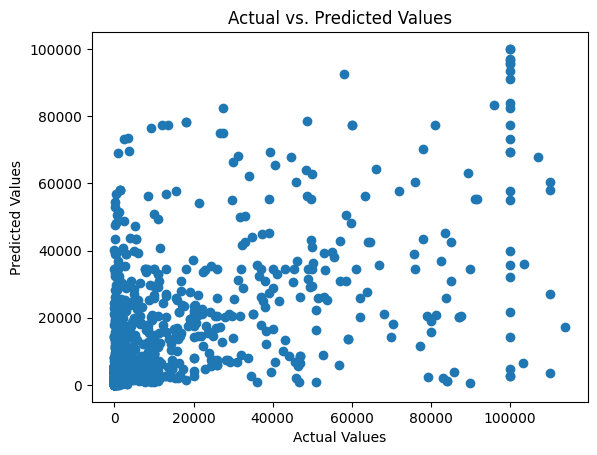

In [42]:
plt.scatter(y_test, predictions)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()


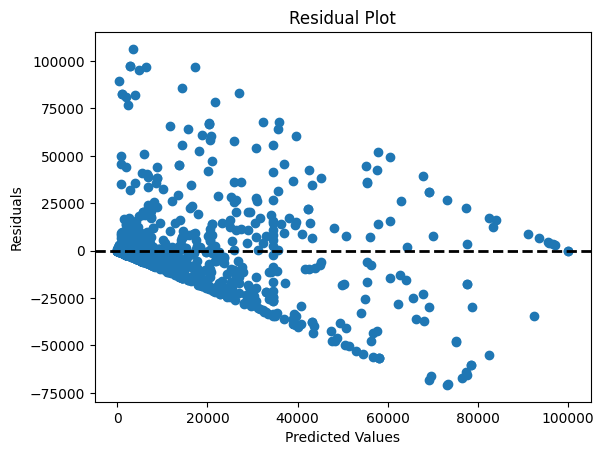

In [43]:
residuals = y_test - predictions
plt.scatter(predictions, residuals)
plt.axhline(y=0, color='black', linestyle='--', linewidth=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


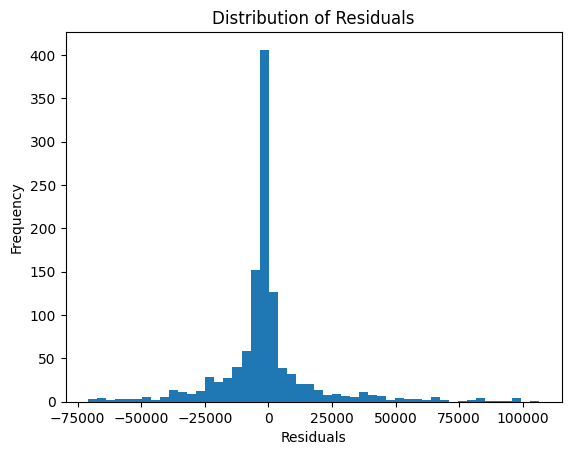

In [44]:
plt.hist(residuals, bins=50)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()


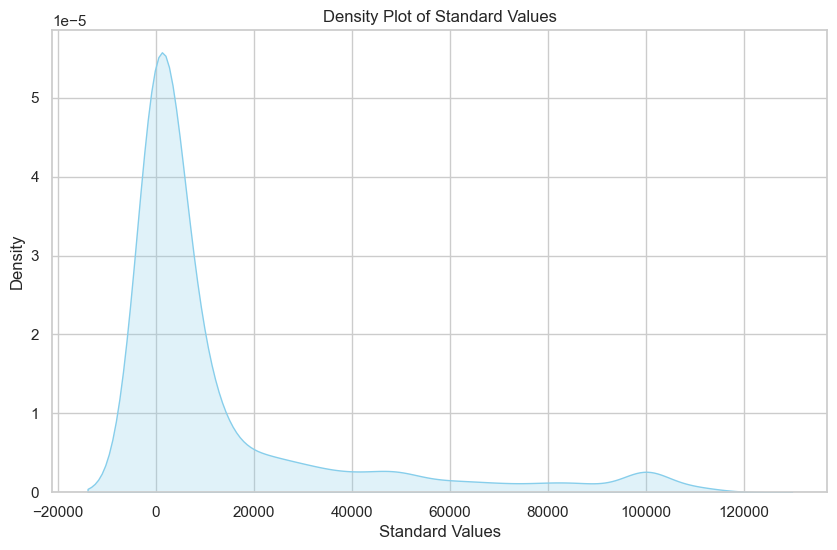

In [45]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.kdeplot(df['standard_value'], fill=True, color='skyblue')

plt.xlabel('Standard Values')
plt.ylabel('Density')
plt.title('Density Plot of Standard Values')

plt.show()

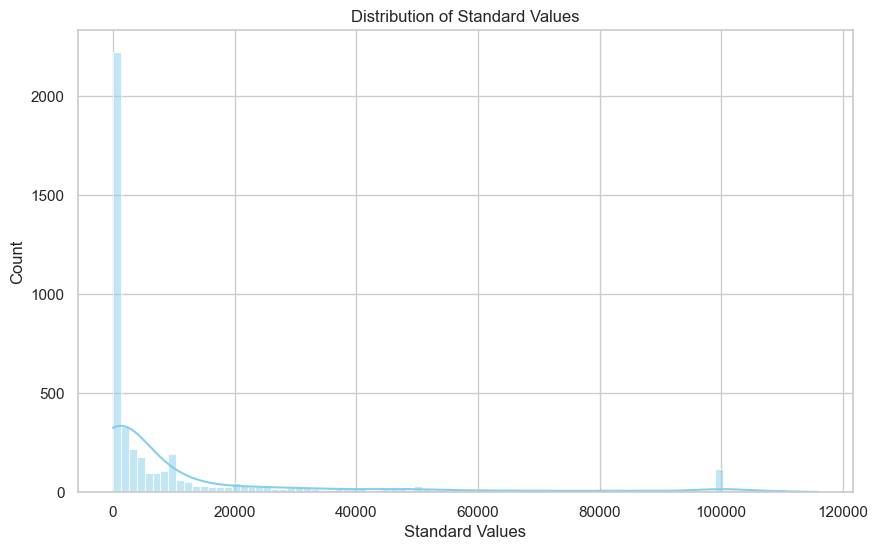

In [46]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.histplot(df['standard_value'], kde=True, fill=True, color='skyblue')

plt.xlabel('Standard Values')
plt.ylabel('Count')
plt.title('Distribution of Standard Values')

plt.show()

In [ ]:
y = df['activity_class']

Accuracy: 0.64
Confusion Matrix:
[[340  36  54]
 [ 38 167  47]
 [ 96  62  85]]


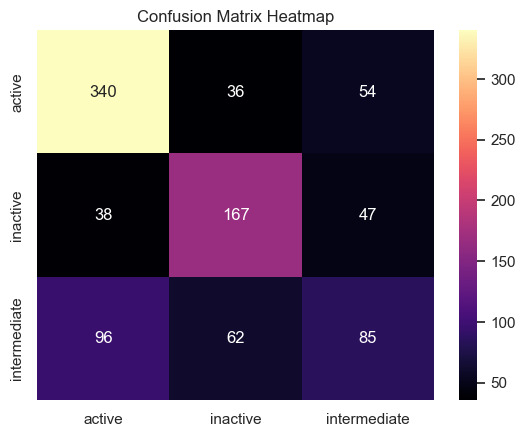

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

clf = RandomForestClassifier(n_estimators=100, random_state=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print("Classification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='magma', xticklabels=clf.classes_, yticklabels=clf.classes_)

plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.5156756756756756
Classification Report:
               precision    recall  f1-score   support

      active       0.50      0.97      0.66       430
    inactive       0.64      0.25      0.36       252
intermediate       0.00      0.00      0.00       243

    accuracy                           0.52       925
   macro avg       0.38      0.40      0.34       925
weighted avg       0.41      0.52      0.40       925



c:\users\03aay\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\03aay\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\03aay\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

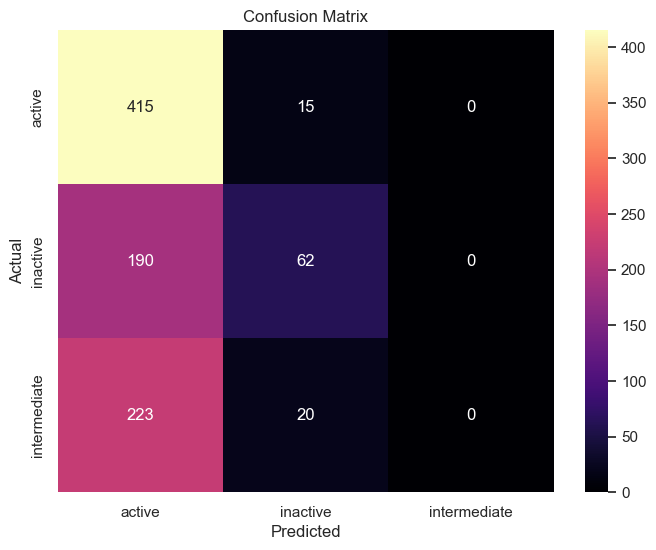

In [49]:
svm_model = SVC(kernel='linear')  

svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="magma", xticklabels=svm_model.classes_, yticklabels=svm_model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
